In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# import warnings
# warnings.filterswarnings('ignore')

In [38]:
file_path = r'C:\Users\614654958\OneDrive - BT Plc\download_one_drive\Personal Stuff\upgrad\github\Bike_Sharing_Case_Study\day.csv'
br = pd.read_csv(file_path)
br.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [39]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No nul values hence imputing no required

In [40]:
br.shape

(730, 16)

In [41]:
br.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


High level flow

1. Read, understanding and visualising the data.
2. Preparing the dataset (train test split, scaling)
3. Training the model.
4. Resdiual analysis
5. Prediction and evaluation on the test set

## Understanding the data

In [42]:
## since instant holds the index values, let get rid of it
br = br.drop('instant', axis=1)

In [43]:
# sns.pairplot(br)
# plt.show()

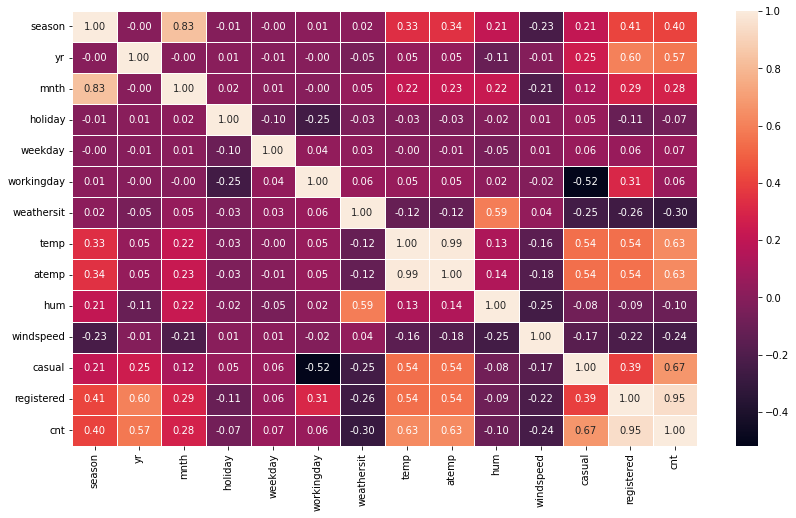

In [44]:
plt.figure(figsize=(14,8))
sns.heatmap(br.corr(), annot=True, linewidth=.5, fmt=".2f")
plt.show()

Following are the observations
1. 'cnt' hightly co related with registered
2. temp and atemp are closed co realted to each other
3. holiday, hum, windspeed and weathersit are negitively co realted
4. weekday and working day are weekly co realted

Following conclusion are drawn
1. drop atemp as most of its imformation is represented by temp.
2. dropping working day and hum as they have very low co relation with the tragets

In [45]:
br = br.drop(['atemp', 'workingday', 'hum'], axis=1)
br.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit',
       'temp', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

## Preparing the data for Modelling

In [46]:
br.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,2,14.110847,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,2,14.902598,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,8.050924,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,8.200000,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,9.305237,12.522300,82,1518,1600


In [ ]:
## getting rid of date column
br = br.drop('dteday', axis=1)

### Encoding the categorical variables

In [65]:
# cat variables require endocding
cat_variables=['season', 'mnth', 'weekday', 'weathersit']

In [73]:
enc = OneHotEncoder()

transformed = enc.fit_transform(br[cat_variables])

onehotlabels = transformed.toarray()
print(onehotlabels)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [76]:
transformer = make_column_transformer(
    (OneHotEncoder(), cat_variables),
    remainder='passthrough')

transformed = transformer.fit_transform(br)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

In [78]:
transformed_df.columns

Index(['onehotencoder__season_1', 'onehotencoder__season_2',
       'onehotencoder__season_3', 'onehotencoder__season_4',
       'onehotencoder__mnth_1', 'onehotencoder__mnth_2',
       'onehotencoder__mnth_3', 'onehotencoder__mnth_4',
       'onehotencoder__mnth_5', 'onehotencoder__mnth_6',
       'onehotencoder__mnth_7', 'onehotencoder__mnth_8',
       'onehotencoder__mnth_9', 'onehotencoder__mnth_10',
       'onehotencoder__mnth_11', 'onehotencoder__mnth_12',
       'onehotencoder__weekday_0', 'onehotencoder__weekday_1',
       'onehotencoder__weekday_2', 'onehotencoder__weekday_3',
       'onehotencoder__weekday_4', 'onehotencoder__weekday_5',
       'onehotencoder__weekday_6', 'onehotencoder__weathersit_1',
       'onehotencoder__weathersit_2', 'onehotencoder__weathersit_3',
       'remainder__dteday', 'remainder__yr', 'remainder__holiday',
       'remainder__temp', 'remainder__windspeed', 'remainder__casual',
       'remainder__registered', 'remainder__cnt'],
      dtype='object'

### Performing the train test split

In [49]:
X = br.drop('cnt', axis=1)
y = br.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [51]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(730, 11)
(511, 11)
(219, 11)


### Rescaling the features

## understanding the distribution of the features to be scaled

<AxesSubplot: xlabel='registered', ylabel='Count'>

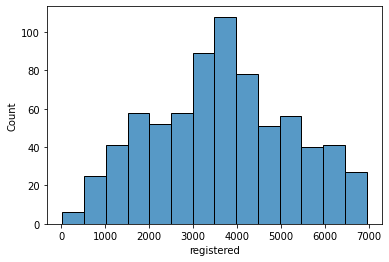

In [58]:
sns.histplot(br.registered)